# Forças exercidas pelas ondas em estacas

## Documentação as forças

#### Algum outro texto?

### Força de arraste
$$
F_D = C_D \cdot \frac{1}{2} \cdot \rho g D H^2 \left [ \frac{gT^2}{4L^2} \cdot \left ( \frac{\cosh (k \cdot (z + h))}{\cosh(kh)} \right )^2  \right ] \cdot \left | \cos \left ( \frac{2 \pi t}{T} \right ) \right | \cdot \cos \left ( \frac{2 \pi t}{T} \right )
$$


## Implementação do solver

In [33]:
import sympy as sym

def solver_forcadearraste(
    v=1,
    FD = sym.Symbol('FD'),
    CD = sym.Symbol('CD'),
    rho = sym.Symbol('𝜌'),
    g = sym.Symbol('g'),
    D = sym.Symbol('D'),
    H = sym.Symbol('H'),
    T = sym.Symbol('T'),
    L = sym.Symbol('L'),
    k = sym.Symbol('k'),
    z = sym.Symbol('z'),
    t = sym.Symbol('t'),
    h = sym.Symbol('h')):
    return(sym.solvers.nsolve(
        ( CD*0.5*rho*g*D*(H**2) * 
        ( ((g*T**2)/(4*L**2)) * (( (sym.cosh(k*(z+h)))/(sym.cosh(k*h)) )**2)) *
        sym.Abs(sym.cos(2*sym.pi*t/T)) * sym.cos(2*sym.pi*t/T) ) - FD
        , v
    ))

def solver_forcadearrastemax(
    v=1,
    FD = sym.Symbol('FD'),
    CD = sym.Symbol('CD'),
    rho = sym.Symbol('𝜌'),
    g = sym.Symbol('g'),
    D = sym.Symbol('D'),
    H = sym.Symbol('H'),
    T = sym.Symbol('T'),
    L = sym.Symbol('L'),
    k = sym.Symbol('k'),
    z = sym.Symbol('z'),
    h = sym.Symbol('h')):
    return(sym.solvers.nsolve(
        ( CD*0.5*rho*g*D*(H**2) * 
        ( ((g*T**2)/(4*L**2)) * (( (sym.cosh(k*(z+h)))/(sym.cosh(k*h)) )**2)) - FD)
        , v
    ))

### Força de Inércia
$$
F_M = C_M \cdot \rho g \frac{\pi D^2}{4} H \left [ \frac{\pi}{L} \cdot \frac{cosh (k \cdot (z + h))}{cosh (kh)} \right ] \cdot sen \left ( - \frac{2 \pi t}{T} \right )
$$

## Implementação do solver

In [34]:
def solver_forcadeinercia(
    v=1,
    FM = sym.Symbol('FM'),
    CM = sym.Symbol('CM'),
    rho = sym.Symbol('𝜌'),
    g = sym.Symbol('g'),
    D = sym.Symbol('D'),
    H = sym.Symbol('H'),
    T = sym.Symbol('T'),
    L = sym.Symbol('L'),
    k = sym.Symbol('k'),
    z = sym.Symbol('z'),
    t = sym.Symbol('t'),
    h = sym.Symbol('h')):
    return(sym.solvers.nsolve(
        ( CM*rho*g*(sym.pi*(D**2)/4)*H* 
        ( (sym.pi/L) * ((sym.cosh(k*(z+h)))/(sym.cosh(k*h))) ) *
        sym.sin(-2*sym.pi*t/T)) - FM
        , v
    ))

def solver_forcadeinerciamax(
    v=1,
    FM = sym.Symbol('FM'),
    CM = sym.Symbol('CM'),
    rho = sym.Symbol('𝜌'),
    g = sym.Symbol('g'),
    D = sym.Symbol('D'),
    H = sym.Symbol('H'),
    T = sym.Symbol('T'),
    L = sym.Symbol('L'),
    k = sym.Symbol('k'),
    z = sym.Symbol('z'),
    h = sym.Symbol('h')):
    return(sym.solvers.nsolve(
        ( CM*rho*g*(sym.pi*(D**2)/4)*H* 
        ( (sym.pi/L) * ((sym.cosh(k*(z+h)))/(sym.cosh(k*h))) ) - FM)
        , v
    ))

## Plotagem

In [38]:
# Instalar o drawSvg e o pycairo
import drawSvg as draw
largura = 300
altura = 500
d = draw.Drawing(largura, altura, origin='center', displayInline=False)

D = 1.3 * 10
h = 15 * 10

# Draw an irregular polygon

solo = draw.Lines(
    (-largura/2), ((-altura/2)+ 10), # Base da estaca
    (largura/2), ((-altura/2)+ 10),
    (largura/2), (-altura/2),
    (-largura/2), (-altura/2),
    close=True,
    fill='#eeee00',
    stroke='black'
)
estaca = draw.Lines(
    (-D/2), ((-altura/2)+ 10), # Base esquerda da estaca
    (D/2), ((-altura/2)+ 10), # Base direita da estaca
    (D/2), (h+ ((-altura/2)+ 10)), # Topo direito da estaca
    (-D/2), (h+ ((-altura/2)+ 10)), # Topo esquerdo da estaca
    close=True,
    fill='white',
    stroke='black'
)
loads = []
for i in range(h):
    carga_ponto = solver_forcadearrastemax(
        CD = 1.05,
        rho = 1025,
        g = 9.81,
        D = 1.3,
        H = 5.6,
        T = 10,
        L = 110.7,
        k = 0.057,
        z = i/10,
        h = 15
    )
    loads.append( (carga_ponto/100) + (D/2) ) # X
    loads.append( 10*i + ((-altura/2)+ 10) ) # Vai ser o Y

print(loads)
carregamento = draw.Lines(
    tuple(loads),
    close=True,
    fill='red',
    stroke='black'
)
d.append(estaca)
d.append(solo)
d.append(loads)
d.setPixelScale(1)
d

[49.5710398373984, -240.0, 49.9137200370763, -230.0, 50.2605902830810, -220.0, 50.6116956551579, -210.0, 50.9670817834552, -200.0, 51.3267948544545, -190.0, 51.6908816169727, -180.0, 52.0593893882378, -170.0, 52.4323660600386, -160.0, 52.8098601049483, -150.0, 53.1919205826242, -140.0, 53.5785971461837, -130.0, 53.9699400486574, -120.0, 54.3660001495195, -110.0, 54.7668289212983, -100.0, 55.1724784562651, -90.0, 55.5830014732044, -80.0, 55.9984513242652, -70.0, 56.4188820018950, -60.0, 56.8443481458564, -50.0, 57.2749050503282, -40.0, 57.7106086710918, -30.0, 58.1515156328030, -20.0, 58.5976832363511, -10.0, 59.0491694663057, 0.0, 59.5060329984528, 10.0, 59.9683332074201, 20.0, 60.4361301743934, 30.0, 60.9094846949249, 40.0, 61.3884582868344, 50.0, 61.8731131982040, 60.0, 62.3635124154681, 70.0, 62.8597196715992, 80.0, 63.3617994543907, 90.0, 63.8698170148379, 100.0, 64.3838383756179, 110.0, 64.9039303396703, 120.0, 65.4301604988787, 130.0, 65.9625972428553, 140.0, 66.5013097678286, 15

TypeError: __init__() missing 1 required positional argument: 'sy'

## Exemplo

In [3]:
print('Força de Arraste: ')
print( solver_forcadearraste(
    CD = 1.05,
    rho = 1025,
    g = 9.81,
    D = 0.8,
    H = 5.6,
    T = 10,
    L = 110.7,
    k = 0.057,
    z = 0,
    t = 0,
    h = 15.61
) )

print('Força de Inércia: ')
print( solver_forcadeinercia(
    CM = 1.4,
    rho = 1025,
    g = 9.81,
    D = 0.8,
    H = 5.6,
    T = 10,
    L = 110.7,
    k = 0.057,
    z = 0,
    t = 2.5,
    h = 15.61
) )

print('Força de Arraste Max: ')
print( solver_forcadearrastemax(
    CD = 1.05,
    rho = 1025,
    g = 9.81,
    D = 0.8,
    H = 5.6,
    T = 10,
    L = 110.7,
    k = 0.057,
    z = 0,
    h = 15.61
) )

print('Força de Inércia Max: ')
print( solver_forcadeinerciamax(
    CM = 1.4,
    rho = 1025,
    g = 9.81,
    D = 0.8,
    H = 5.6,
    T = 10,
    L = 110.7,
    k = 0.057,
    z = 0,
    h = 15.61
) )

Força de Arraste: 
2650.52552845528
Força de Inércia: 
-1124.55588493266
Força de Arraste Max: 
2650.52552845528
Força de Inércia Max: 
1124.55588493266


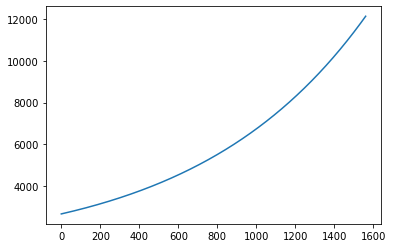

In [4]:
import matplotlib.pyplot as plt
forca = []
for i in range (0, 1561):
    forca.append(solver_forcadearrastemax(
    CD = 1.05,
    rho = 1025,
    g = 9.81,
    D = 0.8,
    H = 5.6,
    T = 10,
    L = 110.7,
    k = 0.057,
    z = i/100,
    h = 15.61
))

plt.plot(forca)